<h1>Importação dados b3</h1>

In [1]:
import pandas as pd

dados_b3 = pd.read_csv("D:\\CEDERJ\\2024.2\\tcc\\IVOptionPredictor\\projeto\\data\\b3data.csv", sep=";")

<h1>Analisando importação</h1>

In [27]:
dados_b3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10301 entries, 0 to 10300
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cod_bdi        10301 non-null  int64  
 1   cod_neg        10301 non-null  object 
 2   codigo_origem  0 non-null      float64
 3   codisi         10301 non-null  object 
 4   data_geracao   0 non-null      float64
 5   data_pregao    10301 non-null  int64  
 6   datven         10301 non-null  int64  
 7   desmes         10301 non-null  int64  
 8   espec          10301 non-null  object 
 9   fatcot         10301 non-null  int64  
 10  indopc         10301 non-null  int64  
 11  modref         10301 non-null  object 
 12  nom_res        10301 non-null  object 
 13  nome_arquivo   0 non-null      float64
 14  prazot         8648 non-null   float64
 15  preabe         10301 non-null  object 
 16  preexe         10301 non-null  object 
 17  premax         10301 non-null  object 
 18  premed

<h1>Tratamento dos dados</h1>

In [38]:
dados_b3_filtrado = dados_b3[(dados_b3['tp_merc'] == 70) | (dados_b3['tp_merc'] == 80)]

dados_b3_filtrado = dados_b3_filtrado[(dados_b3_filtrado['nom_res'].str.startswith('GGBR')) | (dados_b3_filtrado['nom_res'].str.startswith('ABEV')) | (dados_b3_filtrado['nom_res'].str.startswith('ITSA')) | (dados_b3_filtrado['nom_res'].str.startswith('B3SA')) | (dados_b3_filtrado['nom_res'].str.startswith('BBDC')) | (dados_b3_filtrado['nom_res'].str.startswith('MGLU'))]

dados_b3_filtrado['preofc'] = dados_b3_filtrado['preofc'].str.replace(',', '.', regex=False)
dados_b3_filtrado['preofv'] = dados_b3_filtrado['preofv'].str.replace(',', '.', regex=False)
dados_b3_filtrado['preult'] = dados_b3_filtrado['preult'].str.replace(',', '.', regex=False)
dados_b3_filtrado['premed'] = dados_b3_filtrado['premed'].str.replace(',', '.', regex=False)
dados_b3_filtrado['preult'] = pd.to_numeric(dados_b3_filtrado['preult'])
dados_b3_filtrado['preofv'] = pd.to_numeric(dados_b3_filtrado['preofv'])
dados_b3_filtrado['preofc'] = pd.to_numeric(dados_b3_filtrado['preofc'])
dados_b3_filtrado['premed'] = pd.to_numeric(dados_b3_filtrado['premed'])
# dados_b3_filtrado = dados_b3_filtrado[(dados_b3_filtrado['preult'] != 0) | (dados_b3_filtrado['preult'] != 0)]
dados_b3_filtrado = dados_b3_filtrado[(dados_b3_filtrado['preofv'] != 0) | (dados_b3_filtrado['preofv'] != 0)]
dados_b3_filtrado = dados_b3_filtrado[(dados_b3_filtrado['preofc'] != 0) | (dados_b3_filtrado['preofc'] != 0)]
dados_b3_filtrado = dados_b3_filtrado[(dados_b3_filtrado['premed'] != 0) | (dados_b3_filtrado['premed'] != 0)]

dados_b3_filtrado['callPut'] = 0
dados_b3_filtrado.loc[dados_b3_filtrado['tp_merc'] == 70, 'callPut'] = 'call'
dados_b3_filtrado.loc[dados_b3_filtrado['tp_merc'] == 80, 'callPut'] = 'put'

def extrair_decimal(cod_neg):
    sufixo = cod_neg[5:]
    
    try:
        strike = float(sufixo[0:2] + '.' + sufixo[2:])
        if strike > 50:
            strike = strike/10
        return strike
    except:
        return 0
    
# Criar a nova coluna com o valor decimal extraído
dados_b3_filtrado['strike'] = dados_b3_filtrado['cod_neg'].apply(extrair_decimal)
# dados_b3_filtrado['premio'] = (dados_b3_filtrado['preofc'] + dados_b3_filtrado['preult']) /2
dados_b3_filtrado['premio'] = dados_b3_filtrado['premed']
dados_b3_filtrado['taxaDeJuros'] = 0.11
dados_b3_filtrado['dado_original'] = 1


def determinar_vencimento(vencimento):
    diasAteVencDict = {20250321: 116,
                        20241114: 30,
                        20241220: 55,
                        20250221: 98,
                        20250117: 73,
                        20241101: 21,
                        20241108: 26}
    try:
        return diasAteVencDict[vencimento]
    except:
        return 0

dados_b3_filtrado['diasAteVencimento'] = dados_b3_filtrado['datven'].apply(determinar_vencimento)
dados_b3_filtrado = dados_b3_filtrado[dados_b3_filtrado['diasAteVencimento'] != 0]

spot_ABEV = 13.28
spot_ITSA = 10.62
spot_B3SA = 10.75
spot_BBDC = 15.06
spot_MGLU = 9.67
spot_GGBR = 19.18
dados_b3_filtrado['spot'] = 0
dados_b3_filtrado.loc[dados_b3_filtrado['cod_neg'].str.startswith('ABEV'), 'spot'] = spot_ABEV
dados_b3_filtrado.loc[dados_b3_filtrado['cod_neg'].str.startswith('ITSA'), 'spot'] = spot_ITSA
dados_b3_filtrado.loc[dados_b3_filtrado['cod_neg'].str.startswith('B3SA'), 'spot'] = spot_B3SA
dados_b3_filtrado.loc[dados_b3_filtrado['cod_neg'].str.startswith('BBDC'), 'spot'] = spot_BBDC
dados_b3_filtrado.loc[dados_b3_filtrado['cod_neg'].str.startswith('MGLU'), 'spot'] = spot_MGLU
dados_b3_filtrado.loc[dados_b3_filtrado['cod_neg'].str.startswith('GGBR'), 'spot'] = spot_GGBR

dados_b3_filtrado = dados_b3_filtrado[['cod_neg','data_pregao','diasAteVencimento','datven','strike','premio','taxaDeJuros','spot','callPut','dado_original']]

dados_b3_filtrado

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_31256\3662194276.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'call' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dados_b3_filtrado.loc[dados_b3_filtrado['tp_merc'] == 70, 'callPut'] = 'call'
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_31256\3662194276.py:64: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '13.28' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dados_b3_filtrado.loc[dados_b3_filtrado['cod_neg'].str.startswith('ABEV'), 'spot'] = spot_ABEV


,cod_neg,data_pregao,diasAteVencimento,datven,strike,premio,taxaDeJuros,spot,callPut,dado_original
1680,ABEVK130,20241004,30,20241114,13.0,0.70,0.11,13.28,call,1
1684,ABEVK115,20241004,30,20241114,11.5,0.03,0.11,13.28,call,1
1686,ABEVK140,20241004,30,20241114,14.0,0.23,0.11,13.28,call,1
1687,ABEVK150,20241004,30,20241114,15.0,0.05,0.11,13.28,call,1
1688,ABEVK160,20241004,30,20241114,16.0,0.02,0.11,13.28,call,1
...,...,...,...,...,...,...,...,...,...,...
6986,MGLUX780,20241004,55,20241220,7.8,0.35,0.11,9.67,put,1
6987,MGLUX820,20241004,55,20241220,8.2,0.45,0.11,9.67,put,1
6988,MGLUW680,20241004,30,20241114,6.8,0.07,0.11,9.67,put,1
6990,MGLUW101,20241004,30,20241114,10.1,0.07,0.11,9.67,put,1


In [43]:
# Adicione o diretório raiz do projeto ao sys.path
import os
import sys

# Obtém o diretório de trabalho atual
project_root = os.getcwd()

# Se necessário, ajuste o caminho para subir dois diretórios
project_root = os.path.abspath(os.path.join(project_root, '..', '..'))
sys.path.append(project_root)

from src.IVCalculator.IterativeMethods.NewtonRaphson import newton_raphson_for_volatility

def calculate_volatility(row):
    S = row['spot']
    K = row['strike']
    T = row['diasAteVencimento']/ 252
    r = row['taxaDeJuros']
    market_price = row['premio']
    call_or_put = row['callPut']
    
    vol = newton_raphson_for_volatility(S, K, T, r, market_price, call_or_put)
    
    if ( vol != -1 and vol < 100):        
        print(f"############################# {row.name} volatilidade {vol}")

    return vol

dados_b3_filtrado['vol_implicita'] = dados_b3_filtrado.apply(calculate_volatility, axis=1)

volatilidade: 0.24460915988632517
############################# 1680 volatilidade 0.24460915988632517
volatilidade: 0.2406207971059231
############################# 1686 volatilidade 0.2406207971059231
volatilidade: 0.23848694351079044
############################# 1687 volatilidade 0.23848694351079044
volatilidade: 0.2794010651882369
############################# 1688 volatilidade 0.2794010651882369
volatilidade: 0.23690014539276535
############################# 1692 volatilidade 0.23690014539276535
volatilidade: 0.21030123452989524
############################# 1693 volatilidade 0.21030123452989524
volatilidade: 0.22616108632287726
############################# 1709 volatilidade 0.22616108632287726
volatilidade: 0.3076858397224729
############################# 1716 volatilidade 0.3076858397224729
volatilidade: 0.24126175366136915
############################# 1717 volatilidade 0.24126175366136915
volatilidade: 0.22262229369034608
############################# 1726 volatilidade 0.2226

In [40]:
dados_b3_filtrado.to_csv("dados_b3_ingeridos.csv")

In [9]:
import pandas as pd
dados_b3_filtrado = pd.read_csv("dados_b3_ingeridos.csv", sep=",")
dados_b3_filtrado.loc[dados_b3_filtrado['vol_implicita'] == -1, 'vol_implicita'] = 0

spot_ABEV = 13.28
spot_ITSA = 10.62
spot_B3SA = 10.75
spot_BBDC = 15.06
spot_MGLU = 9.67
spot_GGBR = 19.18

dados_b3_filtrado

,Unnamed: 0,cod_neg,data_pregao,diasAteVencimento,datven,strike,premio,taxaDeJuros,spot,callPut,dado_original,vol_implicita
0,1680,ABEVK130,20241004,30,20241114,13.0,0.70,0.11,13.28,call,1,0.244609
1,1684,ABEVK115,20241004,30,20241114,11.5,0.03,0.11,13.28,call,1,0.000000
2,1686,ABEVK140,20241004,30,20241114,14.0,0.23,0.11,13.28,call,1,0.240621
3,1687,ABEVK150,20241004,30,20241114,15.0,0.05,0.11,13.28,call,1,0.238487
4,1688,ABEVK160,20241004,30,20241114,16.0,0.02,0.11,13.28,call,1,0.279401
...,...,...,...,...,...,...,...,...,...,...,...,...
220,6986,MGLUX780,20241004,55,20241220,7.8,0.35,0.11,9.67,put,1,0.000000
221,6987,MGLUX820,20241004,55,20241220,8.2,0.45,0.11,9.67,put,1,0.663440
222,6988,MGLUW680,20241004,30,20241114,6.8,0.07,0.11,9.67,put,1,0.000000
223,6990,MGLUW101,20241004,30,20241114,10.1,0.07,0.11,9.67,put,1,0.000000


In [9]:
dados_b3_filtrado

,Unnamed: 0,cod_neg,data_pregao,diasAteVencimento,datven,strike,premio,taxaDeJuros,spot,callPut,dado_original,vol_implicita
0,1680,ABEVK130,20241004,30,20241114,13.0,0.70,0.11,13.28,call,1,0.244609
1,1684,ABEVK115,20241004,30,20241114,11.5,0.03,0.11,13.28,call,1,-1.000000
2,1686,ABEVK140,20241004,30,20241114,14.0,0.23,0.11,13.28,call,1,0.240621
3,1687,ABEVK150,20241004,30,20241114,15.0,0.05,0.11,13.28,call,1,0.238487
4,1688,ABEVK160,20241004,30,20241114,16.0,0.02,0.11,13.28,call,1,0.279401
...,...,...,...,...,...,...,...,...,...,...,...,...
220,6986,MGLUX780,20241004,55,20241220,7.8,0.35,0.11,9.67,put,1,-1.000000
221,6987,MGLUX820,20241004,55,20241220,8.2,0.45,0.11,9.67,put,1,0.663440
222,6988,MGLUW680,20241004,30,20241114,6.8,0.07,0.11,9.67,put,1,-1.000000
223,6990,MGLUW101,20241004,30,20241114,10.1,0.07,0.11,9.67,put,1,-1.000000


<h1>Analisando Dados</h1>

<h5>Importando modelo</h5>

In [12]:
from joblib import load

# Carregar o modelo salvo
modelo_boost_carregado = load('boost_treinado.joblib')

<h5>Segregando dados</h5>

In [10]:
dados_b3_abev = dados_b3_filtrado[dados_b3_filtrado['cod_neg'].str.startswith('ABEV')]
dados_b3_itsa = dados_b3_filtrado[dados_b3_filtrado['cod_neg'].str.startswith('ITSA')]
dados_b3_b3sa = dados_b3_filtrado[dados_b3_filtrado['cod_neg'].str.startswith('B3SA')]
dados_b3_bbdc = dados_b3_filtrado[dados_b3_filtrado['cod_neg'].str.startswith('BBDC')]
dados_b3_mglu = dados_b3_filtrado[dados_b3_filtrado['cod_neg'].str.startswith('MGLU')]
dados_b3_ggbr = dados_b3_filtrado[dados_b3_filtrado['cod_neg'].str.startswith('GGBR')]

<h2>Funções</h2>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import pearsonr

# Função quadrática com o ponto de mínimo (x0, y0)
def quadratic_with_minimum(x, a, x0, y0):
    return a * (x - x0)**2 + y0

# Função para ajustar os dados com a restrição de mínimo
def fit_quadratic_with_minimum(x, y, x0, y0):
    # Função auxiliar para ajustar sem passar x0 e y0 diretamente para curve_fit
    def fit_func(x, a):
        return quadratic_with_minimum(x, a, x0, y0)
    
    # Ajustar a função aos dados
    popt, _ = curve_fit(fit_func, x, y)
    
    # Retornar os coeficientes ajustados (a) garantindo que a > 0 (concavidade positiva)
    a = abs(popt[0])  # Garantir que o valor de a seja positivo
    return a, x0, y0

def fitar_superficie(dados: pd.DataFrame, dias_vencimento: int, spot: int):
    dados.loc[dados['vol_implicita'] == -1, 'vol_implicita'] = 0
    dados_no_vencimento = dados[dados['diasAteVencimento'] == dias_vencimento]
    dados_no_vencimento = dados[dados['vol_implicita'] > 0]
    x_data = dados_no_vencimento['strike']
    y_data = dados_no_vencimento['vol_implicita']

    # Ponto onde a derivada deve ser zero (por exemplo, x0 = 2)
    x0 = spot

    dados_originais = dados[dados['dado_original'] == 1]
    diferencas = (dados_originais['strike'] - x0).abs()
    menor_diferenca = diferencas.min()
    registros_com_menor_diferenca = dados_originais[(diferencas == menor_diferenca)]
    valor_mais_proximo = registros_com_menor_diferenca['vol_implicita'].mean()

    # Obter o valor mais próximo
    # valor_mais_proximo = dados_no_vencimento.loc[indice_mais_proximo, 'vol_implicita']

    y0 = valor_mais_proximo

    # Ajustar a função quadrática com as restrições
    a, x0, y0 = fit_quadratic_with_minimum(x_data, y_data, x0, y0)

    # Exibir a equação ajustada
    print(f'Equação ajustada: y = {a:.3f}(x - {x0})^2 + {y0}')

    # Calcular os valores previstos pelo modelo ajustado
    y_pred = a * (x_data - x0)**2 + y0

    # Calcular o coeficiente de correlação de Pearson
    corr_coef, _ = pearsonr(y_data, y_pred)
    print(f'Coeficiente de correlação de Pearson: {corr_coef:.4f}')

    # Plotando os dados e a função ajustada
    x_fit = np.linspace(min(x_data), max(x_data), 100)
    y_fit = a * (x_fit - x0)**2 + y0

    plt.scatter(dados['strike'], dados['vol_implicita'], label='Dados')
    plt.plot(x_fit, y_fit, color='red', label='Ajuste Quadrático')
    plt.axvline(x=x0, color='green', linestyle='--', label=f'Derivada zero em x={x0}')
    plt.scatter([x0], [y0], color='blue', label=f'Mínimo em ({x0}, {y0})', zorder=5)
    plt.legend()
    plt.ylim(bottom=0)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Ajuste Quadrático com Concavidade Positiva')
    plt.show()

In [13]:
def fittar_superficie_predita(dados: pd.DataFrame, spot: int, vencimento: int, range_spot: int = 1):
    dados_validos = dados[dados['vol_implicita'] != 0]
    dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})

    dados_faltantes = dados[dados['vol_implicita'] <= 0.01]
    dados_faltantes = dados_faltantes[(dados_faltantes['strike'] <= spot*(1 + range_spot)) & (dados_faltantes['strike'] >= spot*(1 - range_spot))]
    dados_faltantes.loc[:, 'callPut'] = dados_faltantes['callPut'].replace({'call': 0, 'put': 1})

    dados_faltantes.loc[:, 'diasAteVencimento'] = dados_faltantes['diasAteVencimento'] / 252.0

    features_dados_faltantes = dados_faltantes[['strike', 'diasAteVencimento', 'spot', 'taxaDeJuros', 'premio', 'callPut']].values

    vol_implicita_pred = modelo_boost_carregado.predict(features_dados_faltantes)

    dados_faltantes['vol_implicita'] = vol_implicita_pred
    
    dados_faltantes['dado_original'] = 0

    dados_completos = pd.concat([dados_validos, dados_faltantes])

    dados_completos[dados_completos['diasAteVencimento'] == 30]

    fitar_superficie(dados_completos, vencimento, spot)

<h3>ABEV3</h3>

In [87]:

dados_b3_abev

,cod_neg,data_pregao,diasAteVencimento,datven,strike,premio,taxaDeJuros,spot,callPut,vol_implicita
1678,ABEVC13,20241004,116,20250321,13.00,0.74,0.1,13.28,call,-1.000000
1680,ABEVK130,20241004,30,20241114,13.00,0.72,0.1,13.28,call,0.262431
1684,ABEVK115,20241004,30,20241114,11.50,0.04,0.1,13.28,call,-1.000000
1685,ABEVK125,20241004,30,20241114,12.50,0.12,0.1,13.28,call,-1.000000
1686,ABEVK140,20241004,30,20241114,14.00,0.23,0.1,13.28,call,0.243599
1687,ABEVK150,20241004,30,20241114,15.00,0.05,0.1,13.28,call,0.240441
1688,ABEVK160,20241004,30,20241114,16.00,0.02,0.1,13.28,call,0.280990
1689,ABEVL122,20241004,55,20241220,12.20,0.50,0.1,13.28,call,-1.000000
1690,ABEVB125,20241004,98,20250221,12.50,0.47,0.1,13.28,call,-1.000000
1692,ABEVK145,20241004,30,20241114,14.50,0.12,0.1,13.28,call,0.247187


In [204]:
print("30 dias até o vencimento "  + str((dados_b3_abev[dados_b3_abev['diasAteVencimento'] == 30]).shape[0]))
print("55 dias até o vencimento "  + str((dados_b3_abev[dados_b3_abev['diasAteVencimento'] == 55]).shape[0]))
# print("30 dias até o vencimento "  + str((dados_b3_abev[dados_b3_abev['diasAteVencimento'] == 30]).shape[0]))

dados_abev_30dias = dados_b3_abev[dados_b3_abev['diasAteVencimento'] == 30]
dados_abev_30dias.loc[dados_abev_30dias['vol_implicita'] == -1, 'vol_implicita'] = 0
dados_abev_30dias.sort_values(by='strike')

30 dias até o vencimento 19
55 dias até o vencimento 5


KeyError: 'vol_implicita'

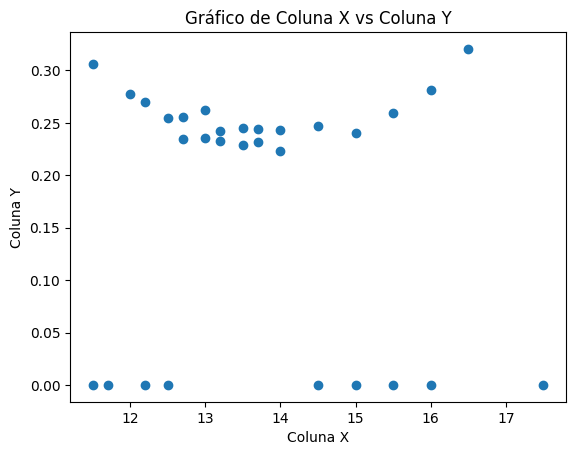

In [135]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotando um gráfico de linha utilizando as colunas 'coluna_x' e 'coluna_y'
plt.scatter(dados_abev_30dias['strike'], dados_abev_30dias['vol_implicita'])

# Adicionando rótulos aos eixos e título
plt.xlabel('Coluna X')
plt.ylabel('Coluna Y')
plt.title('Gráfico de Coluna X vs Coluna Y')

# Exibindo o gráfico
plt.show()

Equação ajustada: y = 0.005(x - 13.28)^2 + 0.2368217639368308
Coeficiente de correlação de Pearson: 0.5806


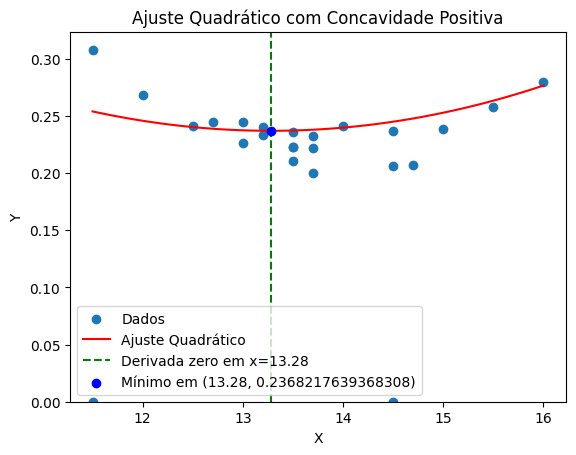

In [14]:
fitar_superficie(dados_b3_abev, 30, spot=spot_ABEV)

<h3>ITSA</h3>

In [ ]:
dados_b3_itsa

In [153]:
print("30 dias até o vencimento "  + str((dados_b3_itsa[dados_b3_itsa['diasAteVencimento'] == 30]).shape[0]))
print("55 dias até o vencimento "  + str((dados_b3_itsa[dados_b3_itsa['diasAteVencimento'] == 55]).shape[0]))
# print("30 dias até o vencimento "  + str((dados_b3_itsa[dados_b3_itsa['diasAteVencimento'] == 30]).shape[0]))

dados_b3_itsa_30dias = dados_b3_itsa[dados_b3_itsa['diasAteVencimento'] == 30]
dados_b3_itsa_30dias.loc[dados_b3_itsa_30dias['vol_implicita'] == -1, 'vol_implicita'] = 0
dados_b3_itsa_30dias.sort_values(by='strike')

30 dias até o vencimento 14
55 dias até o vencimento 9


,cod_neg,data_pregao,diasAteVencimento,datven,strike,premio,taxaDeJuros,spot,callPut,vol_implicita
6065,ITSAK96,20241004,30,20241114,9.60,0.17,0.11,10.62,call,0.000000
6091,ITSAW985,20241004,30,20241114,9.85,0.04,0.11,10.62,put,0.210952
6067,ITSAK100,20241004,30,20241114,10.00,0.86,0.11,10.62,call,0.262804
6092,ITSAW100,20241004,30,20241114,10.00,0.06,0.11,10.62,put,0.209645
6068,ITSAK104,20241004,30,20241114,10.40,0.45,0.11,10.62,call,0.160054
6093,ITSAW104,20241004,30,20241114,10.40,0.19,0.11,10.62,put,0.236166
6050,ITSAW105,20241004,30,20241114,10.50,0.14,0.11,10.62,put,0.171655
6053,ITSAK109,20241004,30,20241114,10.90,0.25,0.11,10.62,call,0.213663
6082,ITSAW109,20241004,30,20241114,10.90,0.36,0.11,10.62,put,0.194151
6069,ITSAK110,20241004,30,20241114,11.00,0.20,0.11,10.62,call,0.205635


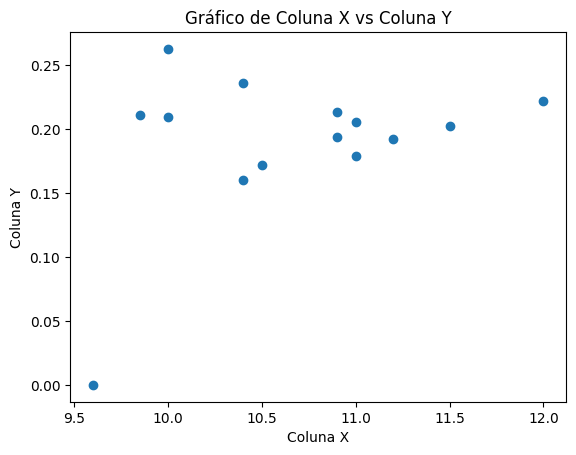

In [154]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotando um gráfico de linha utilizando as colunas 'coluna_x' e 'coluna_y'
plt.scatter(dados_b3_itsa_30dias['strike'], dados_b3_itsa_30dias['vol_implicita'])

# Adicionando rótulos aos eixos e título
plt.xlabel('Coluna X')
plt.ylabel('Coluna Y')
plt.title('Gráfico de Coluna X vs Coluna Y')

# Exibindo o gráfico
plt.show()


Equação ajustada: y = 0.020(x - 10.62)^2 + 0.16875029845859002
Coeficiente de correlação de Pearson: 0.3229


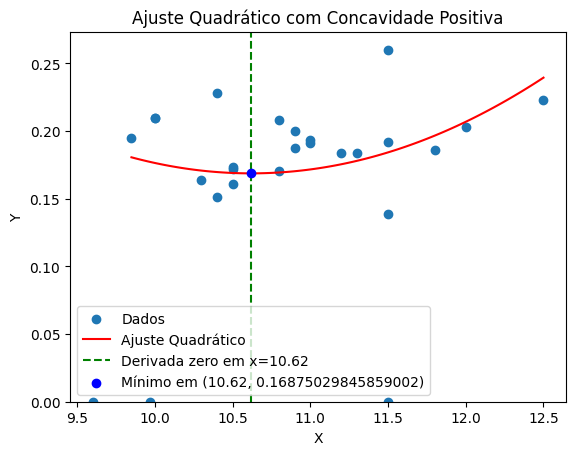

In [15]:
fitar_superficie(dados_b3_itsa, 30, spot=spot_ITSA)

<h3>B3SA</h3>

In [116]:
dados_b3_b3sa.sort_values(by='strike')

,cod_neg,data_pregao,diasAteVencimento,datven,strike,premio,taxaDeJuros,spot,callPut,vol_implicita
2281,B3SAW828,20241004,30,20241114,8.28,0.01,0.1,10.75,put,0.000000
2224,B3SAW916,20241004,30,20241114,9.16,0.04,0.1,10.75,put,0.347800
2225,B3SAW926,20241004,30,20241114,9.26,0.05,0.1,10.75,put,0.349031
2226,B3SAW936,20241004,30,20241114,9.36,0.05,0.1,10.75,put,0.331054
2227,B3SAW946,20241004,30,20241114,9.46,0.06,0.1,10.75,put,0.330640
2228,B3SAW956,20241004,30,20241114,9.56,0.07,0.1,10.75,put,0.325795
2229,B3SAW966,20241004,30,20241114,9.66,0.07,0.1,10.75,put,0.306480
2230,B3SAW976,20241004,30,20241114,9.76,0.09,0.1,10.75,put,0.312214
2231,B3SAW986,20241004,30,20241114,9.86,0.10,0.1,10.75,put,0.303420
2232,B3SAW996,20241004,30,20241114,9.96,0.12,0.1,10.75,put,0.303560


30 dias até o vencimento 33
55 dias até o vencimento 16


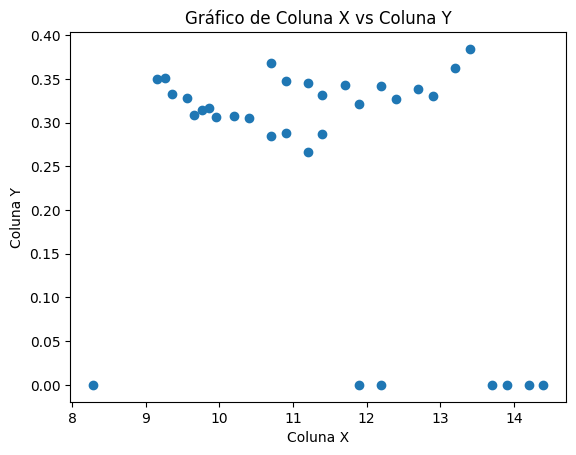

In [212]:
print("30 dias até o vencimento "  + str((dados_b3_b3sa[dados_b3_b3sa['diasAteVencimento'] == 30]).shape[0]))
print("55 dias até o vencimento "  + str((dados_b3_b3sa[dados_b3_b3sa['diasAteVencimento'] == 55]).shape[0]))
# print("30 dias até o vencimento "  + str((dados_b3_b3sa[dados_b3_b3sa['diasAteVencimento'] == 30]).shape[0]))

dados_b3_b3sa_30dias = dados_b3_b3sa[dados_b3_b3sa['diasAteVencimento'] == 30]
dados_b3_b3sa_30dias.loc[dados_b3_b3sa_30dias['vol_implicita'] == -1, 'vol_implicita'] = 0
dados_b3_b3sa_30dias.sort_values(by='strike')

import pandas as pd
import matplotlib.pyplot as plt

# Plotando um gráfico de linha utilizando as colunas 'coluna_x' e 'coluna_y'
plt.scatter(dados_b3_b3sa_30dias['strike'], dados_b3_b3sa_30dias['vol_implicita'])

# Adicionando rótulos aos eixos e título
plt.xlabel('Coluna X')
plt.ylabel('Coluna Y')
plt.title('Gráfico de Coluna X vs Coluna Y')

# Exibindo o gráfico
plt.show()

Equação ajustada: y = 0.002(x - 10.75)^2 + 0.32675212760930583
Coeficiente de correlação de Pearson: 0.4063


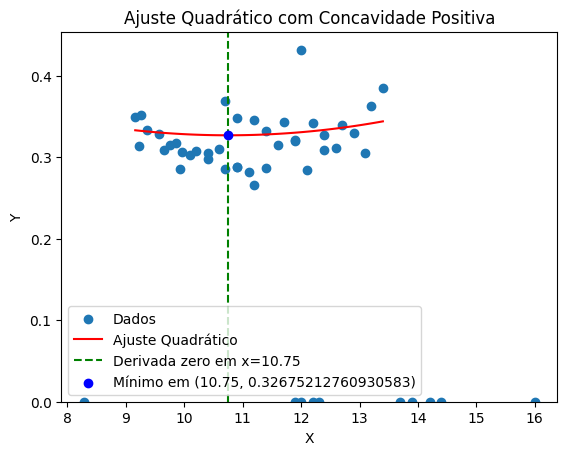

In [20]:
fitar_superficie(dados_b3_b3sa, 30, spot=spot_B3SA)

<h3>BBDC</h3>

In [208]:
dados_b3_bbdc

,cod_neg,data_pregao,diasAteVencimento,datven,strike,premio,taxaDeJuros,spot,callPut,vol_implicita
2605,BBDCX13,20241004,55,20241220,13.00,0.26,0.11,15.06,put,0.405043
2612,BBDCK140,20241004,30,20241114,14.00,0.43,0.11,15.06,call,-1.000000
2613,BBDCW132,20241004,30,20241114,13.20,0.23,0.11,15.06,put,0.469749
2629,BBDCK141,20241004,30,20241114,14.10,0.25,0.11,15.06,call,-1.000000
2630,BBDCK151,20241004,30,20241114,15.10,0.10,0.11,15.06,call,-1.000000
...,...,...,...,...,...,...,...,...,...,...
2830,BBDCW615,20241004,30,20241114,6.15,0.44,0.11,15.06,put,-1.000000
2851,BBDCK19,20241004,30,20241114,19.00,0.03,0.11,15.06,call,0.355559
2854,BBDCK789,20241004,30,20241114,7.89,0.07,0.11,15.06,call,-1.000000
2855,BBDCK163,20241004,30,20241114,16.30,0.27,0.11,15.06,call,0.308623


In [209]:
print("30 dias até o vencimento "  + str((dados_b3_bbdc[dados_b3_bbdc['diasAteVencimento'] == 30]).shape[0]))
print("55 dias até o vencimento "  + str((dados_b3_bbdc[dados_b3_bbdc['diasAteVencimento'] == 55]).shape[0]))
# print("30 dias até o vencimento "  + str((dados_b3_bbdc[dados_b3_bbdc['diasAteVencimento'] == 30]).shape[0]))

dados_b3_bbdc_30dias = dados_b3_bbdc[dados_b3_bbdc['diasAteVencimento'] == 30]
dados_b3_bbdc_30dias.loc[dados_b3_bbdc_30dias['vol_implicita'] == -1, 'vol_implicita'] = 0
dados_b3_bbdc_30dias.sort_values(by='strike')
dados_b3_bbdc_30dias.to_csv("dados_bbdc.csv")

30 dias até o vencimento 40
55 dias até o vencimento 23


PermissionError: [Errno 13] Permission denied: 'dados_bbdc.csv'

30 dias até o vencimento 40
55 dias até o vencimento 23


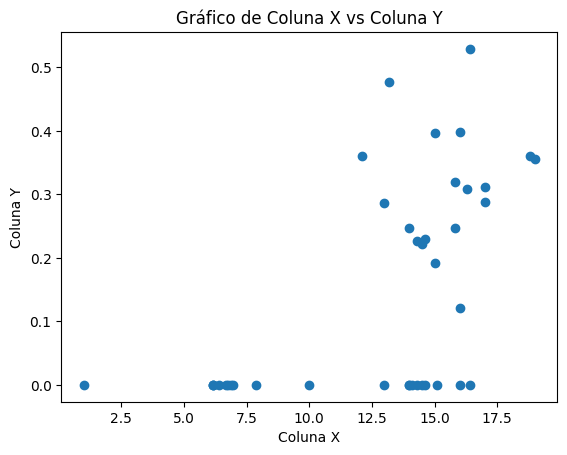

In [151]:
print("30 dias até o vencimento "  + str((dados_b3_bbdc[dados_b3_bbdc['diasAteVencimento'] == 30]).shape[0]))
print("55 dias até o vencimento "  + str((dados_b3_bbdc[dados_b3_bbdc['diasAteVencimento'] == 55]).shape[0]))
# print("30 dias até o vencimento "  + str((dados_b3_bbdc[dados_b3_bbdc['diasAteVencimento'] == 30]).shape[0]))

dados_b3_bbdc_30dias = dados_b3_bbdc[dados_b3_bbdc['diasAteVencimento'] == 30]
dados_b3_bbdc_30dias.loc[dados_b3_bbdc_30dias['vol_implicita'] == -1, 'vol_implicita'] = 0
dados_b3_bbdc_30dias.sort_values(by='strike')

import pandas as pd
import matplotlib.pyplot as plt

# Plotando um gráfico de linha utilizando as colunas 'coluna_x' e 'coluna_y'
plt.scatter(dados_b3_bbdc_30dias['strike'], dados_b3_bbdc_30dias['vol_implicita'])

# Adicionando rótulos aos eixos e título
plt.xlabel('Coluna X')
plt.ylabel('Coluna Y')
plt.title('Gráfico de Coluna X vs Coluna Y')

# Exibindo o gráfico
plt.show()

In [206]:
dados_b3_bbdc

,cod_neg,data_pregao,diasAteVencimento,datven,strike,premio,taxaDeJuros,spot,callPut
2605,BBDCX13,20241004,55,20241220,13.00,0.26,0.11,15.06,put
2612,BBDCK140,20241004,30,20241114,14.00,0.43,0.11,15.06,call
2613,BBDCW132,20241004,30,20241114,13.20,0.23,0.11,15.06,put
2629,BBDCK141,20241004,30,20241114,14.10,0.25,0.11,15.06,call
2630,BBDCK151,20241004,30,20241114,15.10,0.10,0.11,15.06,call
...,...,...,...,...,...,...,...,...,...
2830,BBDCW615,20241004,30,20241114,6.15,0.44,0.11,15.06,put
2851,BBDCK19,20241004,30,20241114,19.00,0.03,0.11,15.06,call
2854,BBDCK789,20241004,30,20241114,7.89,0.07,0.11,15.06,call
2855,BBDCK163,20241004,30,20241114,16.30,0.27,0.11,15.06,call


Equação ajustada: y = 0.011(x - 15.06)^2 + 0.19975003005295672
Coeficiente de correlação de Pearson: 0.4157


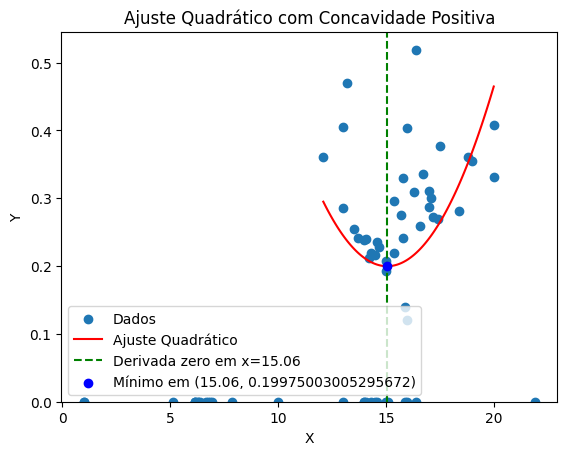

In [8]:
fitar_superficie(dados_b3_bbdc, 30, spot_BBDC)

In [18]:
dados_validos

NameError: name 'dados_validos' is not defined

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_12472\1836165092.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_12472\1836165092.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_faltantes.loc[:, 'callPut'] = dados_faltantes['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_12472\1836165092.py:9: FutureWarni

Equação ajustada: y = 0.003(x - 15.06)^2 + 0.19975003005295672
Coeficiente de correlação de Pearson: 0.4820


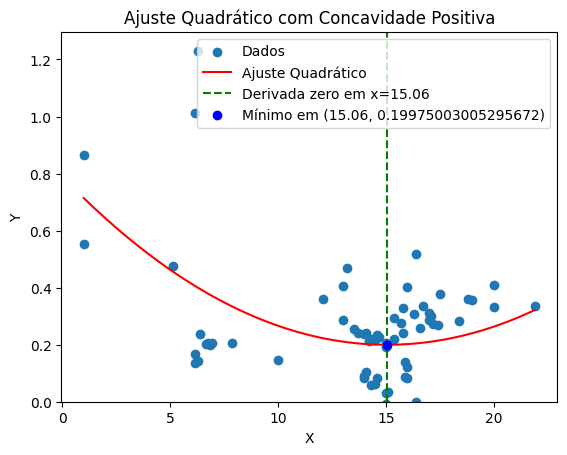

In [8]:
fittar_superficie_predita(dados_b3_bbdc, spot_BBDC, 30, 30)

<h3>MGLU</h3>

In [175]:
print("30 dias até o vencimento "  + str((dados_b3_mglu[dados_b3_mglu['diasAteVencimento'] == 30]).shape[0]))
print("55 dias até o vencimento "  + str((dados_b3_mglu[dados_b3_mglu['diasAteVencimento'] == 55]).shape[0]))
# print("30 dias até o vencimento "  + str((dados_b3_mglu[dados_b3_mglu['diasAteVencimento'] == 30]).shape[0]))

dados_b3_mglu_30dias = dados_b3_mglu[dados_b3_mglu['diasAteVencimento'] == 55]
dados_b3_mglu_30dias.loc[dados_b3_mglu_30dias['vol_implicita'] == -1, 'vol_implicita'] = 0
dados_b3_mglu_30dias.sort_values(by='strike')

30 dias até o vencimento 21
55 dias até o vencimento 9


,cod_neg,data_pregao,diasAteVencimento,datven,strike,premio,taxaDeJuros,spot,callPut,vol_implicita
6950,MGLUX570,20241004,55,20241220,5.7,0.07,0.11,9.67,put,0.000000
6951,MGLUX770,20241004,55,20241220,7.7,0.30,0.11,9.67,put,0.000000
6986,MGLUX780,20241004,55,20241220,7.8,0.35,0.11,9.67,put,0.000000
6987,MGLUX820,20241004,55,20241220,8.2,0.45,0.11,9.67,put,0.663440
6930,MGLUX880,20241004,55,20241220,8.8,0.64,0.11,9.67,put,0.647227
6932,MGLUX920,20241004,55,20241220,9.2,0.70,0.11,9.67,put,0.581585
6936,MGLUX930,20241004,55,20241220,9.3,0.84,0.11,9.67,put,0.638139
6786,MGLUL126,20241004,55,20241220,12.6,0.33,0.11,9.67,call,0.000000
6760,MGLUL205,20241004,55,20241220,20.5,0.03,0.11,9.67,call,0.000000


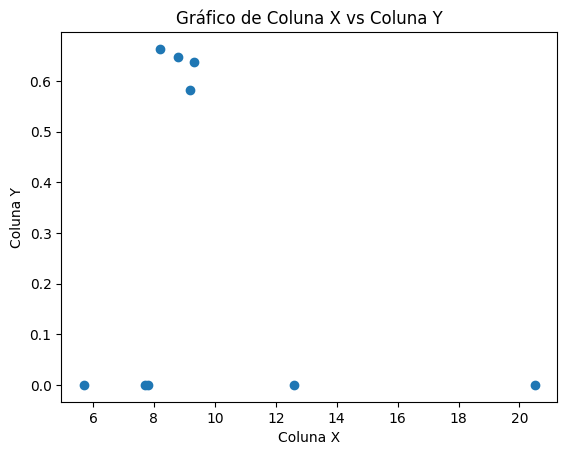

In [211]:


import pandas as pd
import matplotlib.pyplot as plt

# Plotando um gráfico de linha utilizando as colunas 'coluna_x' e 'coluna_y'
plt.scatter(dados_b3_mglu_30dias['strike'], dados_b3_mglu_30dias['vol_implicita'])

# Adicionando rótulos aos eixos e título
plt.xlabel('Coluna X')
plt.ylabel('Coluna Y')
plt.title('Gráfico de Coluna X vs Coluna Y')

# Exibindo o gráfico
plt.show()

Equação ajustada: y = 0.006(x - 9.67)^2 + 0.6390205064398105
Coeficiente de correlação de Pearson: -0.0080


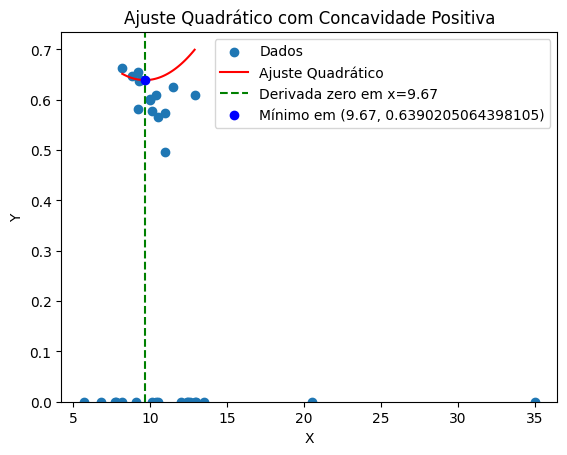

In [19]:

fitar_superficie(dados_b3_mglu, 30, spot=spot_MGLU)

<h3>GGBR</h3>

In [1]:
print("30 dias até o vencimento "  + str((dados_b3_ggbr[dados_b3_ggbr['diasAteVencimento'] == 30]).shape[0]))
print("55 dias até o vencimento "  + str((dados_b3_ggbr[dados_b3_ggbr['diasAteVencimento'] == 55]).shape[0]))
# print("30 dias até o vencimento "  + str((dados_b3_ggbr[dados_b3_ggbr['diasAteVencimento'] == 30]).shape[0]))

dados_b3_ggbr_30dias = dados_b3_ggbr[dados_b3_ggbr['diasAteVencimento'] == 30]
dados_b3_ggbr_30dias.loc[dados_b3_ggbr_30dias['vol_implicita'] == -1, 'vol_implicita'] = 0
dados_b3_ggbr_30dias.sort_values(by='strike')

import pandas as pd
import matplotlib.pyplot as plt

# Plotando um gráfico de linha utilizando as colunas 'coluna_x' e 'coluna_y'
plt.scatter(dados_b3_ggbr_30dias['strike'], dados_b3_ggbr_30dias['vol_implicita'])

# Adicionando rótulos aos eixos e título
plt.xlabel('Coluna X')
plt.ylabel('Coluna Y')
plt.title('Gráfico de Coluna X vs Coluna Y')

# Exibindo o gráfico
plt.show()

NameError: name 'dados_b3_ggbr' is not defined

Equação ajustada: y = 0.007(x - 19.18)^2 + 0.2430473075765999
Coeficiente de correlação de Pearson: 0.2430


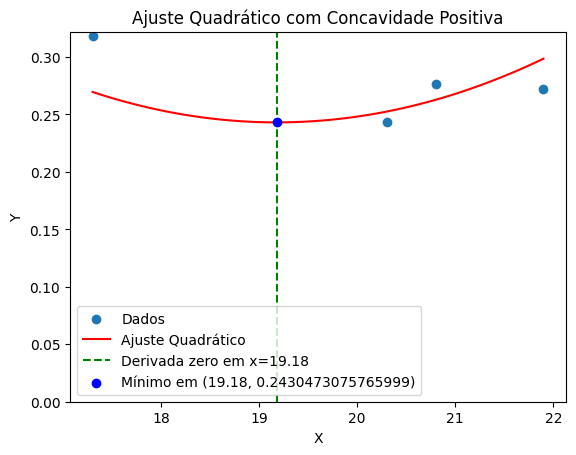

In [18]:
dados_b3_ggbr_30dias = dados_b3_ggbr[dados_b3_ggbr['diasAteVencimento'] == 55]
dados_b3_ggbr_30dias.loc[dados_b3_ggbr_30dias['vol_implicita'] == -1, 'vol_implicita'] = 0

fitar_superficie(dados_b3_ggbr_30dias, 30, spot=spot_GGBR)